# Simultaneous Resistance/Reactance/Impedance
## Example H2 from the GUM

This example demonstrates three simultaneous functions and loading raw measurement data from a CSV file. All the input parameters, including mean, standard uncertainty, degrees of freedom, and correlations are determined from the data points in IVdata.csv file.

In [1]:
import matplotlib.pyplot as plt
import suncal
import numpy as np

In [2]:
# Load the raw data from a file. This data is from Table H.2 in GUM.
V, J, th = np.genfromtxt('IVdata.csv', delimiter=',', skip_header=1).T

In [3]:
# Three functions to calculate
R = 'R = V/J * cos(theta)'
X = 'X = V/J * sin(theta)'
Z = 'Z = V/J'
u = suncal.UncertCalc([R, X, Z], units=['ohm', 'ohm', 'ohm'])

k = np.sqrt(len(V))
# Note that numpy's std() function normalizes by N, not N-1! Use ddof=1.
u.set_input('V', nom=V.mean(), std=V.std(ddof=1)/k, units='volt')
u.set_input('J', nom=J.mean(), std=J.std(ddof=1)/k, units='mA')
u.set_input('theta', nom=th.mean(), std=th.std(ddof=1)/k, units='rad')

# Use numpy to determine correlation coefficients, set matrix directly.
u.set_correlation(np.corrcoef(np.vstack((V, J, th))), names=['J', 'V', 'theta'])

In [4]:
out = u.calculate()
out.report(n=3)

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$R$   | GUM          | 127.732 Ω  | 0.276 Ω           | ± 0.542 Ω     | 1.960     | inf           |
|$R$   | Monte Carlo  | 127.733 Ω  | 0.277 Ω           | (127.191 Ω, 128.276 Ω) | 1.960     | -             |
|$X$   | GUM          | 219.847 Ω  | 0.127 Ω           | ± 0.248 Ω     | 1.960     | inf           |
|$X$   | Monte Carlo  | 219.847 Ω | 0.127 Ω          | (219.599 Ω, 220.095 Ω) | 1.960     | -             |
|$Z$   | GUM          | 254.260 Ω | 0.236 Ω          | ± 0.463 Ω    | 1.960     | inf           |
|$Z$   | Monte Carlo  | 254.260 Ω | 0.236 Ω          | (253.797 Ω, 254.725 Ω) | 1.962     | -             |

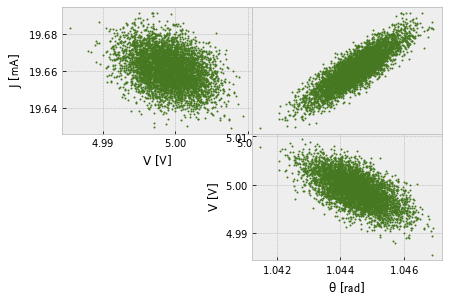

In [5]:
# Scatter plot will show the correlations between variables. Reducing number of points in scatter plot to speed up drawing.
u.out.mc.plot_xscatter(points=5000);

In [6]:
u.out.report_expanded()

### GUM Approximation


|Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|----------|---------|---------|---------|--------------|----------------------|
|$R$   | 99.00%     | 127.02 Ω  | 128.44 Ω  | 2.576     | inf            | 0.71 Ω              |
|-          | 95.00%     | 127.19 Ω  | 128.27 Ω  | 1.960     | inf            | 0.54 Ω              |
|-          | 90.00%     | 127.28 Ω  | 128.19 Ω  | 1.645     | inf            | 0.45 Ω              |
|-          | 68.00%     | 127.46 Ω  | 128.01 Ω | 0.994     | inf            | 0.27 Ω             |
|$X$   | 99.00%     | 219.52 Ω | 220.17 Ω | 2.576     | inf            | 0.33 Ω             |
|-          | 95.00%     | 219.60 Ω | 220.09 Ω | 1.960     | inf            | 0.25 Ω             |
|-          | 90.00%     | 219.64 Ω | 220.05 Ω | 1.645     | inf            | 0.21 Ω             |
|-          | 68.00%     | 219.72 Ω | 219.97 Ω | 0.994     | inf            | 0.13 Ω             |
|$Z$   | 99.00%     | 253.65 Ω | 254.87 Ω | 2.576     | inf            | 0.61 Ω             |
|-          | 95.00%     | 253.80 Ω | 254.72 Ω | 1.960     | inf            | 0.46 Ω             |
|-          | 90.00%     | 253.87 Ω | 254.65 Ω | 1.645     | inf            | 0.39 Ω             |
|-          | 68.00%     | 254.02 Ω | 254.49 Ω | 0.994     | inf            | 0.24 Ω             |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Interval   | Min       | Max       | k        |
|----------|----------|---------|---------|---------|
|$R$   | 99.00%     | 130 Ω  | 130 Ω  | 2.577    |
|-          | 95.00%     | 130 Ω  | 130 Ω  | 1.960    |
|-          | 90.00%     | 130 Ω  | 130 Ω  | 1.645    |
|-          | 68.00%     | 130 Ω  | 130 Ω  | 0.994    |
|$X$   | 99.00%     | 220 Ω  | 220 Ω  | 2.577    |
|-          | 95.00%     | 220 Ω | 220 Ω | 1.960    |
|-          | 90.00%     | 220 Ω | 220 Ω | 1.645    |
|-          | 68.00%     | 220 Ω | 220 Ω | 0.995    |
|$Z$   | 99.00%     | 250 Ω | 250 Ω | 2.579    |
|-          | 95.00%     | 250 Ω | 250 Ω | 1.962    |
|-          | 90.00%     | 250 Ω | 250 Ω | 1.643    |
|-          | 68.00%     | 250 Ω | 250 Ω | 0.995    |

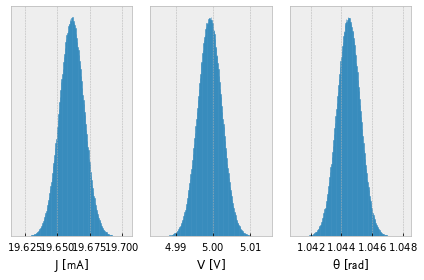

In [7]:
f = plt.figure(figsize=(6,4))
u.out.mc.plot_xhists(fig=f)

In [8]:
u.out.gum.report_derivation()

### Measurement Model:

$R = \frac{V \cos{\left(\theta \right)}}{J}$

$X = \frac{V \sin{\left(\theta \right)}}{J}$

$Z = \frac{V}{J}$

### Input Covariance Matrix [Ux]:


|-         | $J$  | $V$  | $\theta$ |
|---------|---------|---------|---------|
|$J$  | $u_{J}^{2}$  | $\sigma_{JV} u_{J} u_{V}$  | $\sigma_{Jtheta} u_{J} u_{\theta}$ |
|$V$ | $\sigma_{JV} u_{J} u_{V}$ | $u_{V}^{2}$ | $\sigma_{Vtheta} u_{V} u_{\theta}$|
|$\theta$ | $\sigma_{Jtheta} u_{J} u_{\theta}$ | $\sigma_{Vtheta} u_{V} u_{\theta}$ | $u_{\theta}^{2}$|



|-         | $J$ | $V$ | $\theta$|
|---------|---------|---------|---------|
|$J$ | 0.000090 mA²  | -0.000011 V·mA  | 6.1e-06 mA·rad |
|$V$ | -0.000011 V·mA  | 0.000010 V²  | -1.6e-06 V·rad |
|$\theta$ | 6.1e-06 mA·rad  | -1.6e-06 V·rad  | 5.7e-07 rad² |


### Sensitivity Matrix [Cx]:


|-         | $J$ | $V$ | $\theta$|
|---------|---------|---------|---------|
|$R$ | $\frac{\partial}{\partial J} R$ | $\frac{\partial}{\partial V} R$ | $\frac{\partial}{\partial \theta} R$|
|$X$ | $\frac{\partial}{\partial J} X$ | $\frac{\partial}{\partial V} X$ | $\frac{\partial}{\partial \theta} X$|
|$Z$ | $\frac{\partial}{\partial J} Z$ | $\frac{\partial}{\partial V} Z$ | $\frac{\partial}{\partial \theta} Z$|



|-         | $J$ | $V$ | $\theta$|
|---------|---------|---------|---------|
|$R$ | $- \frac{V \cos{\left(\theta \right)}}{J^{2}}$ | $\frac{\cos{\left(\theta \right)}}{J}$ | $- \frac{V \sin{\left(\theta \right)}}{J}$|
|$X$ | $- \frac{V \sin{\left(\theta \right)}}{J^{2}}$ | $\frac{\sin{\left(\theta \right)}}{J}$ | $\frac{V \cos{\left(\theta \right)}}{J}$|
|$Z$ | $- \frac{V}{J^{2}}$ | $\frac{1}{J}$ | $0$|



|-         | $J$ | $V$ | $\theta$|
|---------|---------|---------|---------|
|$R$ | -0.0065 V/mA²  | 0.026 1/mA | -0.22 V/mA|
|$X$ | -0.011 V/mA² | 0.044 1/mA | 0.13 V/mA|
|$Z$ | -0.013 V/mA² | 0.051 1/mA | 0.0|


### Combined Covariance:

$U_y = C_x \cdot U_x \cdot C_x^T$

#### Uncertainties:

$u_{R} = \sqrt{2 \sigma_{JV} u_{J} u_{V} \frac{\partial}{\partial J} R \frac{\partial}{\partial V} R + 2 \sigma_{Jtheta} u_{J} u_{\theta} \frac{\partial}{\partial J} R \frac{\partial}{\partial \theta} R + 2 \sigma_{Vtheta} u_{V} u_{\theta} \frac{\partial}{\partial V} R \frac{\partial}{\partial \theta} R + u_{J}^{2} \left(\frac{\partial}{\partial J} R\right)^{2} + u_{V}^{2} \left(\frac{\partial}{\partial V} R\right)^{2} + u_{\theta}^{2} \left(\frac{\partial}{\partial \theta} R\right)^{2}}$

$u_{X} = \sqrt{2 \sigma_{JV} u_{J} u_{V} \frac{\partial}{\partial J} X \frac{\partial}{\partial V} X + 2 \sigma_{Jtheta} u_{J} u_{\theta} \frac{\partial}{\partial J} X \frac{\partial}{\partial \theta} X + 2 \sigma_{Vtheta} u_{V} u_{\theta} \frac{\partial}{\partial V} X \frac{\partial}{\partial \theta} X + u_{J}^{2} \left(\frac{\partial}{\partial J} X\right)^{2} + u_{V}^{2} \left(\frac{\partial}{\partial V} X\right)^{2} + u_{\theta}^{2} \left(\frac{\partial}{\partial \theta} X\right)^{2}}$

$u_{Z} = \sqrt{2 \sigma_{JV} u_{J} u_{V} \frac{\partial}{\partial J} Z \frac{\partial}{\partial V} Z + 2 \sigma_{Jtheta} u_{J} u_{\theta} \frac{\partial}{\partial J} Z \frac{\partial}{\partial \theta} Z + 2 \sigma_{Vtheta} u_{V} u_{\theta} \frac{\partial}{\partial V} Z \frac{\partial}{\partial \theta} Z + u_{J}^{2} \left(\frac{\partial}{\partial J} Z\right)^{2} + u_{V}^{2} \left(\frac{\partial}{\partial V} Z\right)^{2} + u_{\theta}^{2} \left(\frac{\partial}{\partial \theta} Z\right)^{2}}$

#### Simplified:

$u_{R} = \sqrt{\frac{- \frac{V^{2} u_{\theta}^{2} \cos{\left(2 \theta \right)}}{2} + \frac{V^{2} u_{\theta}^{2}}{2} - V \sigma_{Vtheta} u_{V} u_{\theta} \sin{\left(2 \theta \right)} + \frac{u_{V}^{2} \cos{\left(2 \theta \right)}}{2} + \frac{u_{V}^{2}}{2} + \frac{V^{2} \sigma_{Jtheta} u_{J} u_{\theta} \sin{\left(2 \theta \right)}}{J} - \frac{V \sigma_{JV} u_{J} u_{V} \cos{\left(2 \theta \right)}}{J} - \frac{V \sigma_{JV} u_{J} u_{V}}{J} + \frac{V^{2} u_{J}^{2} \cos{\left(2 \theta \right)}}{2 J^{2}} + \frac{V^{2} u_{J}^{2}}{2 J^{2}}}{J^{2}}} = 0.2764\,\mathrm{ \Omega }$

$u_{X} = \sqrt{\frac{\frac{V^{2} u_{\theta}^{2} \cos{\left(2 \theta \right)}}{2} + \frac{V^{2} u_{\theta}^{2}}{2} + V \sigma_{Vtheta} u_{V} u_{\theta} \sin{\left(2 \theta \right)} - \frac{u_{V}^{2} \cos{\left(2 \theta \right)}}{2} + \frac{u_{V}^{2}}{2} - \frac{V^{2} \sigma_{Jtheta} u_{J} u_{\theta} \sin{\left(2 \theta \right)}}{J} + \frac{V \sigma_{JV} u_{J} u_{V} \cos{\left(2 \theta \right)}}{J} - \frac{V \sigma_{JV} u_{J} u_{V}}{J} - \frac{V^{2} u_{J}^{2} \cos{\left(2 \theta \right)}}{2 J^{2}} + \frac{V^{2} u_{J}^{2}}{2 J^{2}}}{J^{2}}} = 0.1267\,\mathrm{ \Omega }$

$u_{Z} = \sqrt{\frac{J u_{V} \left(J u_{V} - V \sigma_{JV} u_{J}\right) - V u_{J} \left(J \sigma_{JV} u_{V} - V u_{J}\right)}{J^{4}}} = 0.2363\,\mathrm{ \Omega }$

### Effective degrees of freedom:

$\nu_{R} = \frac{u_{R}^{4}}{\frac{V^{4} u_{\theta}^{4} \sin^{4}{\left(\theta \right)}}{J^{4} \nu_{\theta}} + \frac{u_{V}^{4} \cos^{4}{\left(\theta \right)}}{J^{4} \nu_{V}} + \frac{V^{4} u_{J}^{4} \cos^{4}{\left(\theta \right)}}{J^{8} \nu_{J}}} = \infty$

$\nu_{X} = \frac{u_{X}^{4}}{\frac{V^{4} u_{\theta}^{4} \cos^{4}{\left(\theta \right)}}{J^{4} \nu_{\theta}} + \frac{u_{V}^{4} \sin^{4}{\left(\theta \right)}}{J^{4} \nu_{V}} + \frac{V^{4} u_{J}^{4} \sin^{4}{\left(\theta \right)}}{J^{8} \nu_{J}}} = \infty$

$\nu_{Z} = \frac{u_{Z}^{4}}{\frac{u_{V}^{4}}{J^{4} \nu_{V}} + \frac{V^{4} u_{J}^{4}}{J^{8} \nu_{J}}} = \infty$